<a href="https://colab.research.google.com/github/m4rat00n/WordCloud/blob/main/Final_Project_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\LoudryPC\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\LoudryPC\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\LoudryPC\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\LoudryPC\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [ ]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `64635-0.txt` (318.06 kB)


In [ ]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    sting = file_contents.lower()
    sting_list = sting.split()
    new_lst = []
    new_lst2 = []
    frequency={}
    words = ""
    #print(sting_list)
    for word in sting_list:
        words = ""
        for chara in word:
            if chara in punctuations:
                words += ""
            else:
                words += chara
        new_lst.append(words)
    for word in new_lst:
        if word not in uninteresting_words and word.isalpha():
            new_lst2.append(word)
    
    for word in new_lst2:
        if word not in frequency:
            frequency[word] = 1
        else:
            frequency[word] += 1
    #print(new_lst2)
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequency)
    return cloud.to_array()

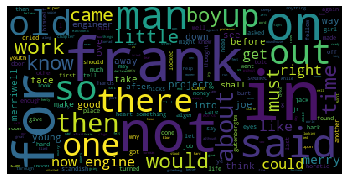

In [ ]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()